In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import mne
import seaborn as sns
import math
sns.set(font_scale=1.2)
from sklearn.model_selection import KFold, cross_val_score
#S = 1
S = (4500000)/4/(2**23-1) #uV/count

In [12]:
# Read data

def read_raw_data(subject):
    df_1 = pd.read_csv(subject + 'data_1/trials.txt', header=4)
    events_df_1 = pd.read_csv(subject + 'data_1/events.txt', header=None)

    df_2 = pd.read_csv(subject + 'data_2/trials.txt', header=4)
    events_df_2 = pd.read_csv(subject + 'data_2/events.txt', header=None)

    df_3 = pd.read_csv(subject + 'data_3/trials.txt', header=4)
    events_df_3 = pd.read_csv(subject + 'data_3/events.txt', header=None)
    
    df_1 = df_1[[' EXG Channel 0', ' EXG Channel 1', ' EXG Channel 2', ' EXG Channel 3', ' EXG Channel 4', ' EXG Channel 5', ' EXG Channel 6', ' EXG Channel 7', ' Timestamp']]
    df_2 = df_2[[' EXG Channel 0', ' EXG Channel 1', ' EXG Channel 2', ' EXG Channel 3', ' EXG Channel 4', ' EXG Channel 5', ' EXG Channel 6', ' EXG Channel 7', ' Timestamp']]
    df_3 = df_3[[' EXG Channel 0', ' EXG Channel 1', ' EXG Channel 2', ' EXG Channel 3', ' EXG Channel 4', ' EXG Channel 5', ' EXG Channel 6', ' EXG Channel 7', ' Timestamp']]
    
    df_1 = df_1.rename(columns={" EXG Channel 0":"Fp1", " EXG Channel 1":"Fp2", " EXG Channel 2":"C3", " EXG Channel 3":"C4", " EXG Channel 4":"P3", " EXG Channel 5":"P4", " EXG Channel 6":"O1", " EXG Channel 7":"O2"})
    df_2 = df_2.rename(columns={" EXG Channel 0":"Fp1", " EXG Channel 1":"Fp2", " EXG Channel 2":"C3", " EXG Channel 3":"C4", " EXG Channel 4":"P3", " EXG Channel 5":"P4", " EXG Channel 6":"O1", " EXG Channel 7":"O2"})
    df_3 = df_3.rename(columns={" EXG Channel 0":"Fp1", " EXG Channel 1":"Fp2", " EXG Channel 2":"C3", " EXG Channel 3":"C4", " EXG Channel 4":"P3", " EXG Channel 5":"P4", " EXG Channel 6":"O1", " EXG Channel 7":"O2"})
    
    events_1 = events_df_1.to_numpy()
    events_2 = events_df_2.to_numpy()
    events_3 = events_df_3.to_numpy()
    
    data_1 = df_1.to_numpy()
    data_2 = df_2.to_numpy()
    data_3 = df_3.to_numpy()
    
    eeg_data_1 = data_1[:,:8]
    eeg_data_2 = data_2[:,:8]
    eeg_data_3 = data_3[:,:8]
    
    time_stamp_1 = data_1[:, 8]
    time_stamp_2 = data_2[:, 8]
    time_stamp_3 = data_3[:, 8]
    
    return eeg_data_1, eeg_data_2, eeg_data_3, events_1, events_2, events_3, time_stamp_1, time_stamp_2, time_stamp_3

In [13]:
# Subject 1, three trial data
sub_1_eeg_data_1, sub_1_eeg_data_2, sub_1_eeg_data_3, sub_1_events_1, sub_1_events_2, sub_1_events_3, sub_1_time_stamp_1, sub_1_time_stamp_2, sub_1_time_stamp_3 = read_raw_data('/content/drive/MyDrive/BTP-MTP/Anushka/Data/Bi_Color/subject_1/')

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
# Subject 2, three trial data
sub_2_eeg_data_1, sub_2_eeg_data_2, sub_2_eeg_data_3, sub_2_events_1, sub_2_events_2, sub_2_events_3, sub_2_time_stamp_1, sub_2_time_stamp_2, sub_2_time_stamp_3 = read_raw_data('/content/drive/MyDrive/BTP-MTP/Anushka/Data/Bi_Color/subject_2/')

In [15]:
# Check the dimentions of the data

print(sub_1_eeg_data_1.shape)
print(sub_1_events_1.shape)
print(sub_1_time_stamp_1.shape)
print('-----------------------')
print(sub_2_eeg_data_1.shape)
print(sub_2_events_1.shape)
print(sub_2_time_stamp_1.shape)

(108582, 8)
(102, 2)
(108582,)
-----------------------
(99196, 8)
(102, 2)
(99196,)


In [16]:
# Plot raw data

def plot_raw(data, i):
    plt.figure(figsize=(5, 3))
    plt.plot(data[2000:2500, i])
    plt.title('Graph of Raw Data for Channel: ' + str(i+1))
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.show()

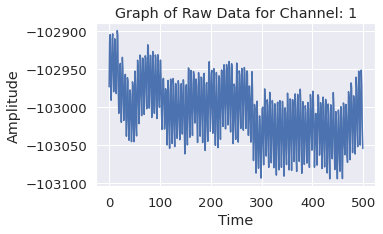

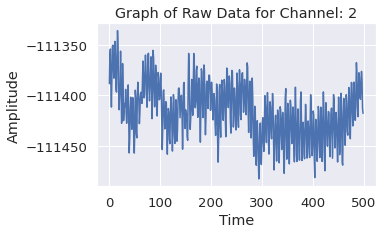

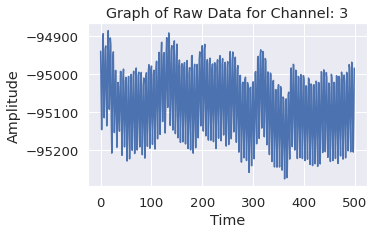

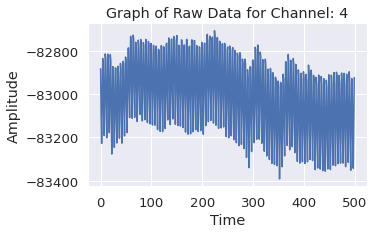

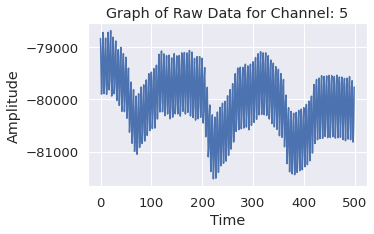

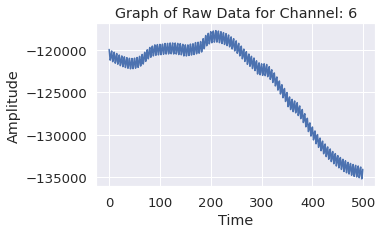

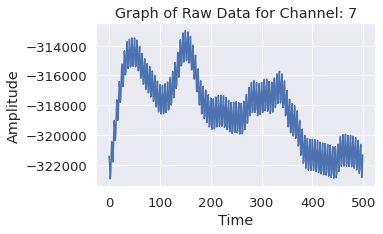

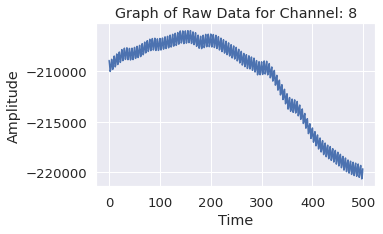

In [17]:
for i in range(8):
    plot_raw(sub_2_eeg_data_3, i)

In [18]:
from scipy import signal

# Define window length (4 seconds)
sf = 256
win = 4 * sf

def plot_psd(data, i):
    freqs, psd = signal.welch(data[:, i], sf, nperseg=win)
    # Plot the power spectrum
    sns.set(font_scale=1.2, style='white')
    plt.figure(figsize=(8, 4))
    plt.plot(freqs, psd, color='k', lw=2)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power spectral density (V^2 / Hz)')
    plt.ylim([0, psd.max() * 1.1])
    plt.title("Welch's periodogram")
    plt.xlim([0, freqs.max()])
    sns.despine()

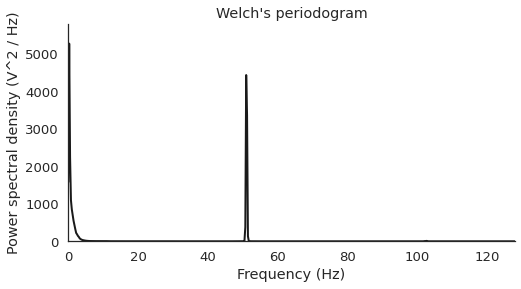

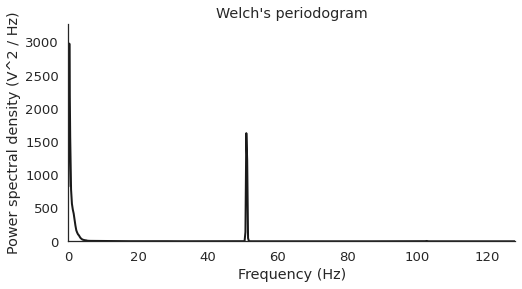

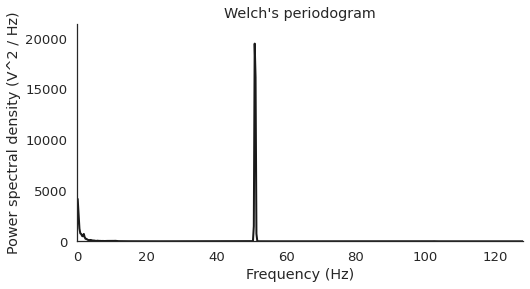

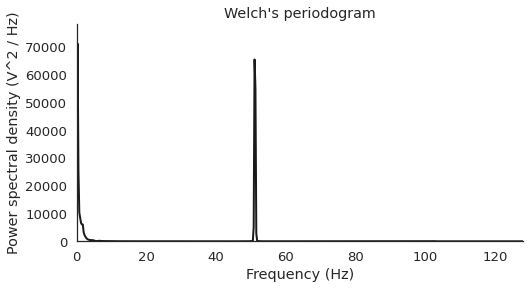

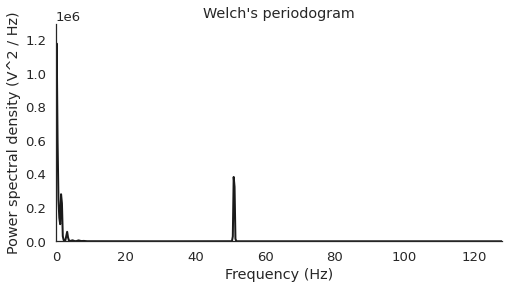

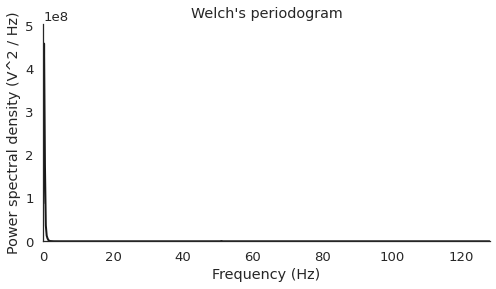

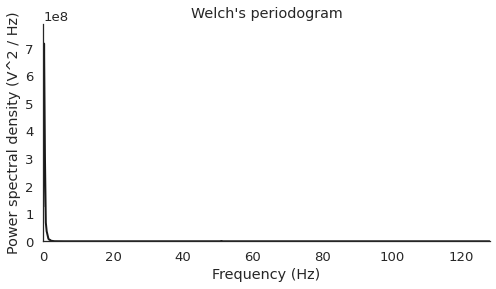

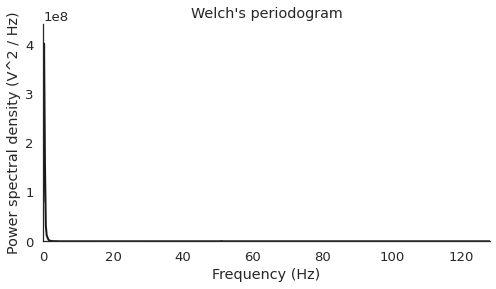

In [19]:
for i in range(8):
    plot_psd(sub_2_eeg_data_2, i)

In [20]:
# Scaling Data with the scale factor S = (4500000)/4/(2**23-1)

sub_1_scaled_data_1 = sub_1_eeg_data_1*S
sub_1_scaled_data_2 = sub_1_eeg_data_2*S
sub_1_scaled_data_3 = sub_1_eeg_data_3*S

sub_2_scaled_data_1 = sub_2_eeg_data_1*S
sub_2_scaled_data_2 = sub_2_eeg_data_2*S
sub_2_scaled_data_3 = sub_2_eeg_data_3*S

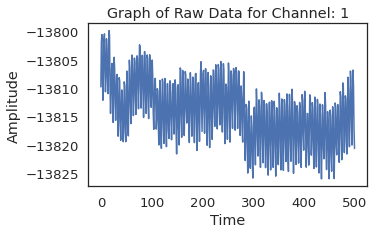

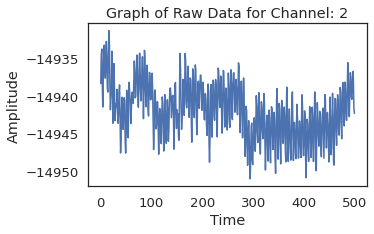

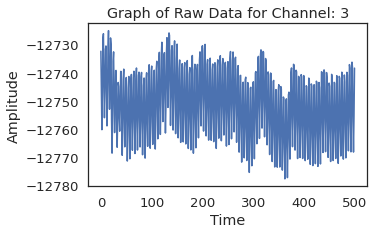

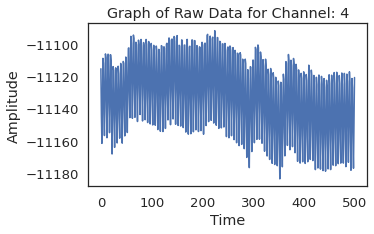

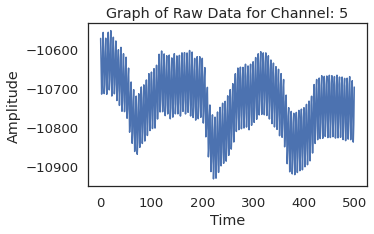

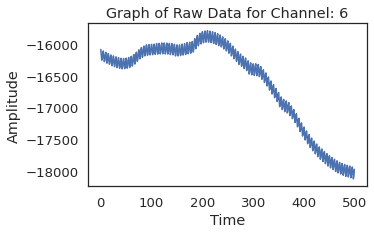

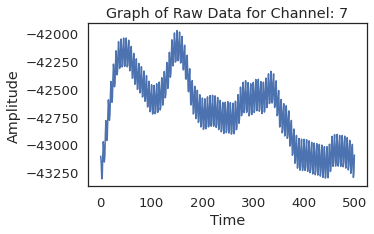

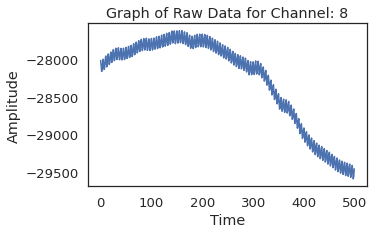

In [21]:
for i in range(8):
    plot_raw(sub_2_scaled_data_3, i)

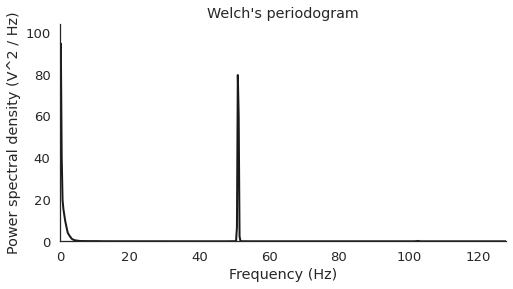

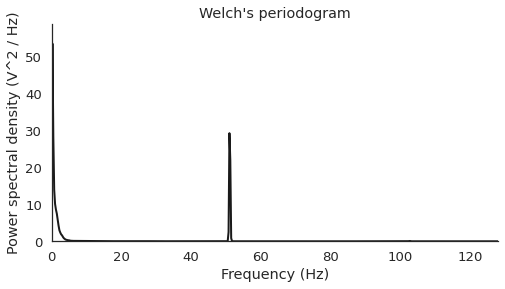

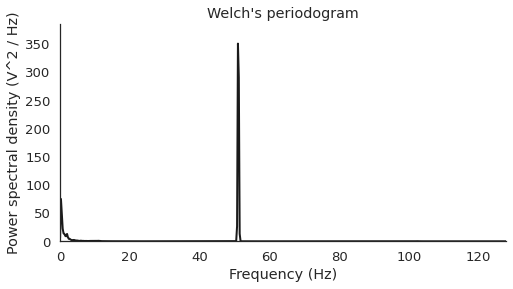

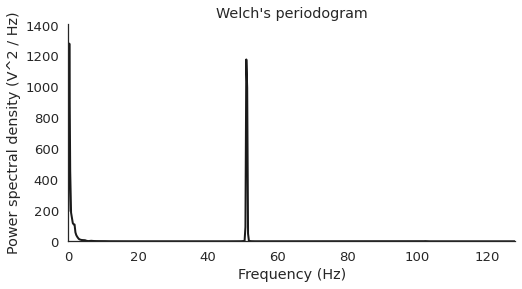

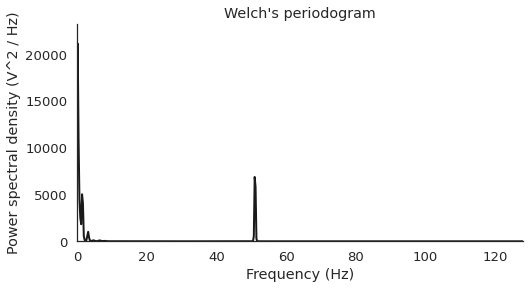

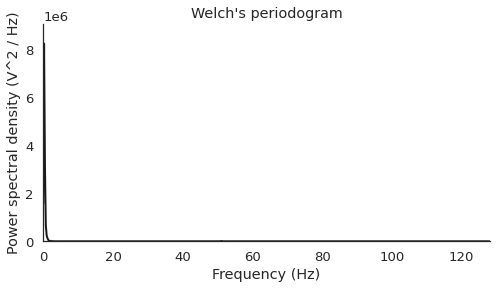

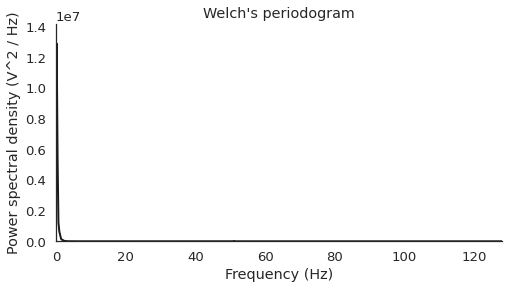

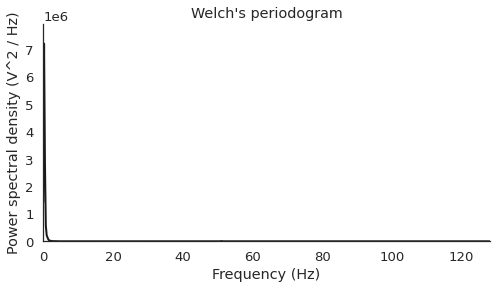

In [22]:
for i in range(8):
    plot_psd(sub_2_scaled_data_2, i)

In [23]:
# Notch filter

def notch_filter(data,samp_freq=256,notch_freq=50,quality_factor=20):
    b_notch, a_notch = signal.iirnotch(notch_freq, quality_factor, samp_freq)
    freq, h = signal.freqz(b_notch, a_notch, fs=samp_freq)
    outputSignal = signal.filtfilt(b_notch, a_notch, data)
    return outputSignal


def data_on_notch_filter(data):
    notched_data = np.zeros((8,data.shape[0]))

    for i,channel in enumerate(data.T):
        notched_data[i] = notch_filter(data.T[i],256,50,20)

    return notched_data.T

In [24]:
# Applying notch filter

notched_sub_1_data_1 = data_on_notch_filter(sub_1_scaled_data_1)
notched_sub_1_data_2 = data_on_notch_filter(sub_1_scaled_data_2)
notched_sub_1_data_3 = data_on_notch_filter(sub_1_scaled_data_3)
notched_sub_2_data_1 = data_on_notch_filter(sub_2_scaled_data_1)
notched_sub_2_data_2 = data_on_notch_filter(sub_2_scaled_data_2)
notched_sub_2_data_3 = data_on_notch_filter(sub_2_scaled_data_3)

print(notched_sub_1_data_1.shape)
print(notched_sub_1_data_2.shape)
print(notched_sub_1_data_3.shape)
print('------------------')
print(notched_sub_2_data_1.shape)
print(notched_sub_2_data_2.shape)
print(notched_sub_2_data_3.shape)

(108582, 8)
(107956, 8)
(94452, 8)
------------------
(99196, 8)
(114782, 8)
(95558, 8)


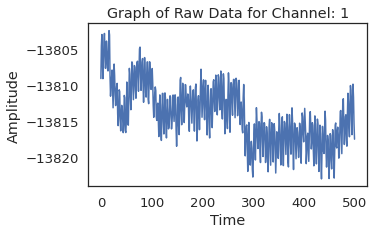

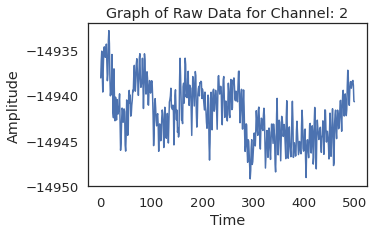

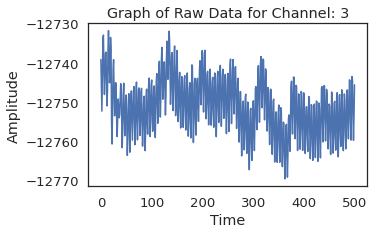

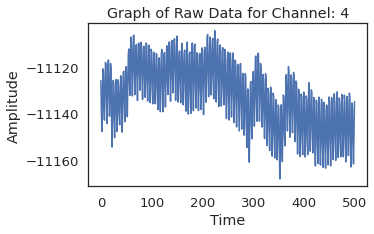

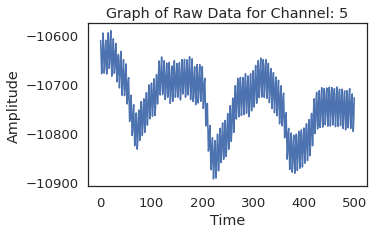

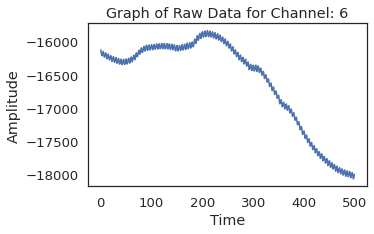

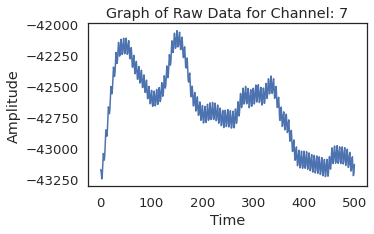

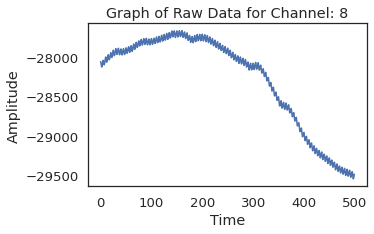

In [25]:
for i in range(8):
    plot_raw(notched_sub_2_data_3, i)

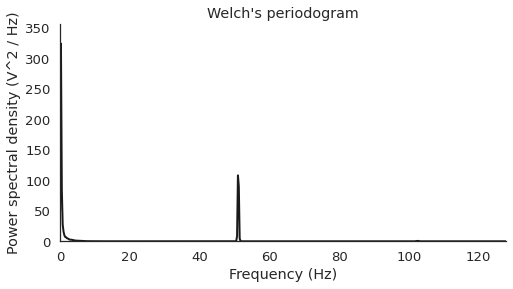

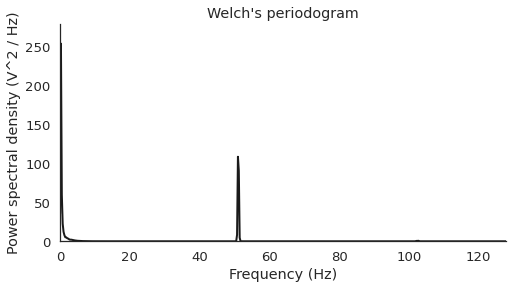

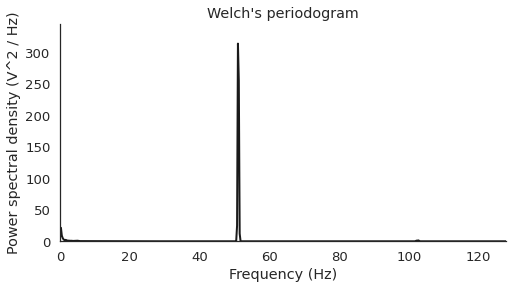

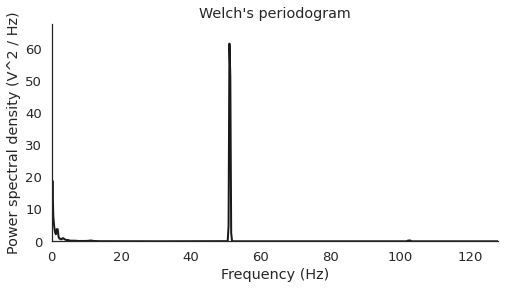

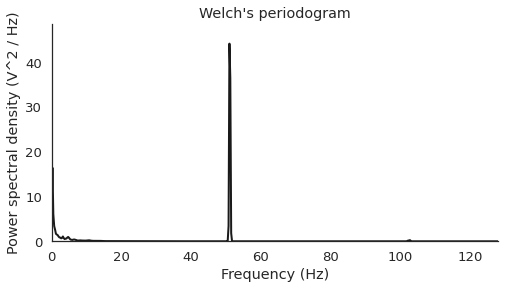

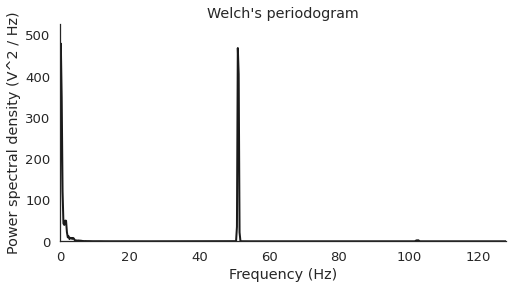

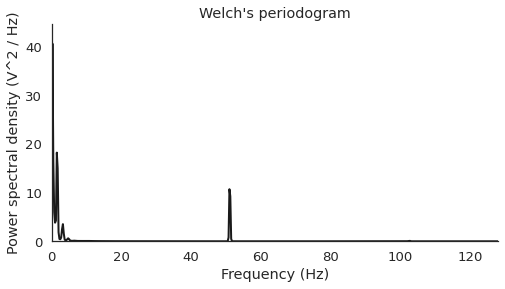

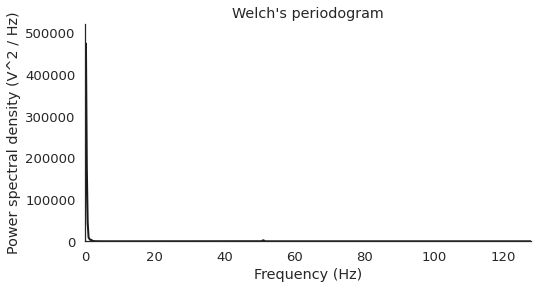

In [26]:
for i in range(8):
    plot_psd(notched_sub_1_data_3, i)

In [27]:
# Bandpass filter

from scipy.signal import butter, lfilter

def butter_bandpass_filter(data, lowcut, highcut, fs, order=6):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

def data_on_bandpass_filter(data):   
    data_preprocessed_1 = np.zeros((8,data.shape[0]))
    for i,channel in enumerate(data.T):
        data_preprocessed_1[i] = butter_bandpass_filter(data.T[i], 0.5,40,256, order=6)

    return data_preprocessed_1.T

In [28]:
# Applying bandpass filter

band_sub_1_data_1 = data_on_bandpass_filter(notched_sub_1_data_1)
band_sub_1_data_2 = data_on_bandpass_filter(notched_sub_1_data_2)
band_sub_1_data_3 = data_on_bandpass_filter(notched_sub_1_data_3)
band_sub_2_data_1 = data_on_bandpass_filter(notched_sub_2_data_1)
band_sub_2_data_2 = data_on_bandpass_filter(notched_sub_2_data_2)
band_sub_2_data_3 = data_on_bandpass_filter(notched_sub_2_data_3)

print(band_sub_1_data_1.shape)
print(band_sub_1_data_2.shape)
print(band_sub_1_data_3.shape)
print('------------------')
print(band_sub_2_data_1.shape)
print(band_sub_2_data_2.shape)
print(band_sub_2_data_3.shape)

(108582, 8)
(107956, 8)
(94452, 8)
------------------
(99196, 8)
(114782, 8)
(95558, 8)


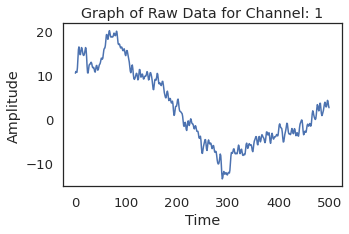

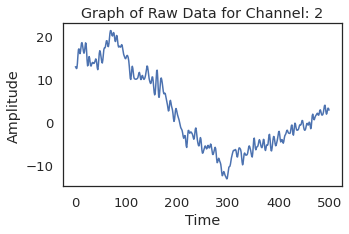

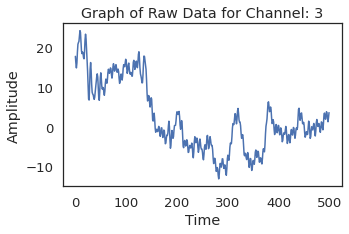

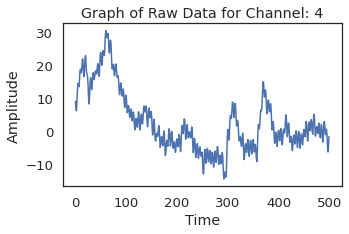

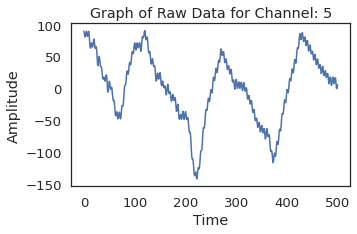

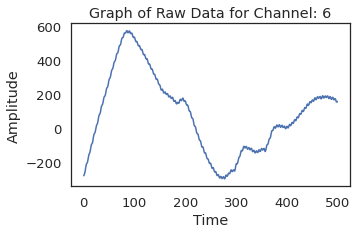

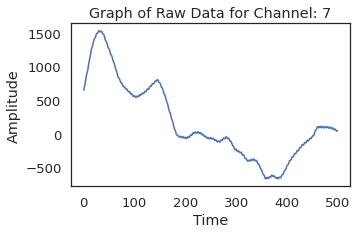

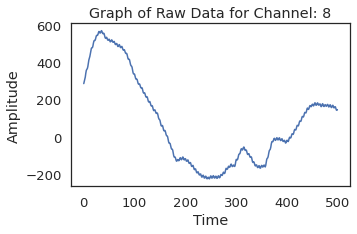

In [29]:
for i in range(8):
    plot_raw(band_sub_2_data_3, i)

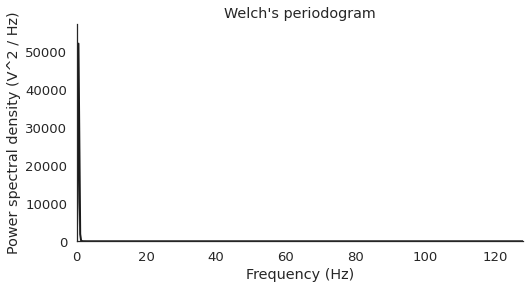

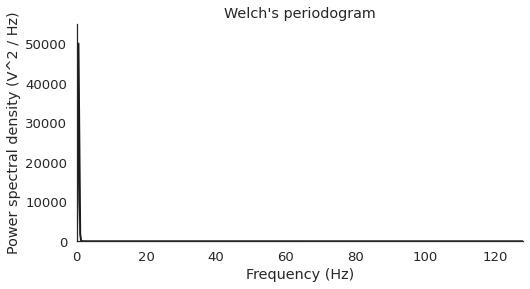

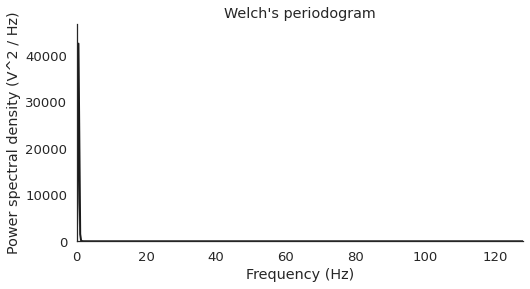

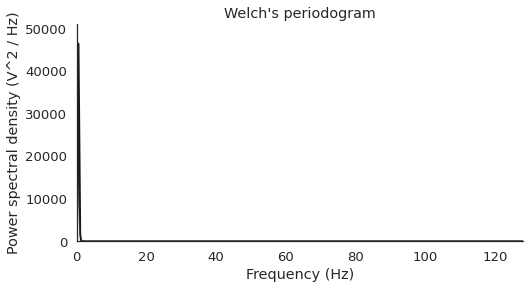

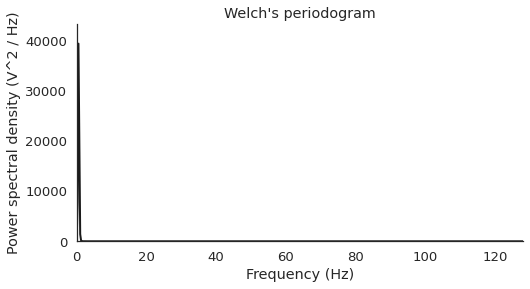

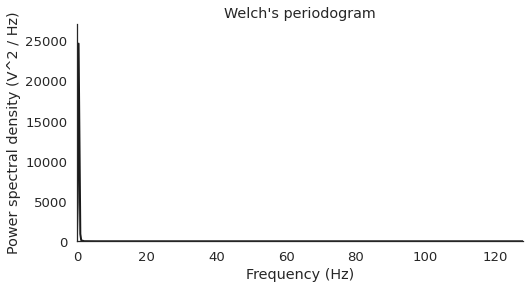

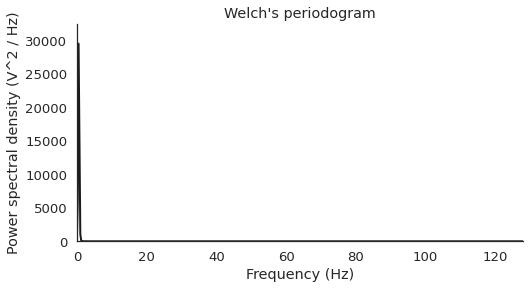

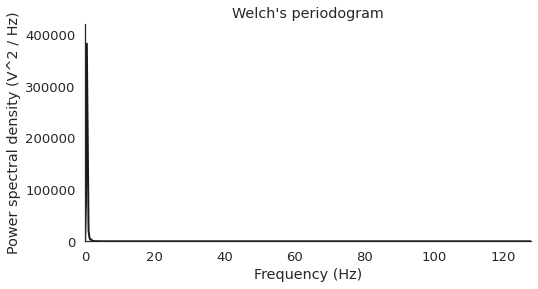

In [30]:
for i in range(8):
    plot_psd(band_sub_1_data_3, i)

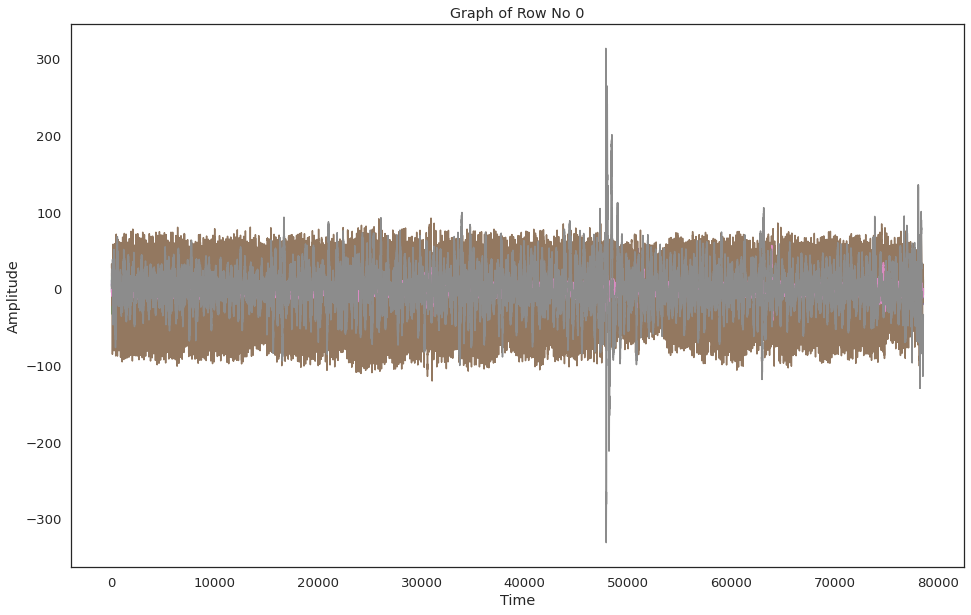

In [31]:
plt.figure(figsize=(16, 10))
plt.plot(band_sub_1_data_1[30000:, :])
plt.title('Graph of Row No 0')
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [85]:
def find_closest(arr, val):
    idx = np.abs(arr - val).argmin()
    return (arr[idx] , idx)

#closest stamps for our dataset
def closest_stamp_values(time_stamps, events):
    closest_stamps_vals = np.zeros(len(events))
    closest_stamps_ids = np.zeros(len(events)) 
    
    event_labels = []
    
    for i in range(len(events)):
        closest_stamps_vals[i] = find_closest(time_stamps, events[i,0])[0]
        closest_stamps_ids[i] = find_closest(time_stamps, events[i,0])[1]
        event_labels.append(events[i,1])
    
    return closest_stamps_vals, closest_stamps_ids, event_labels

def remove_fixation_and_baseline(closest_stamps_ids, event_labels, data):
    session_data =  np.random.randint(100000,900000,(250,250,8))
    rc = 0 # row count 
    markers = []
    for i,image in enumerate(closest_stamps_ids):
        if event_labels[i] == 'red' or event_labels[i] == 'white':
            for j in range(5):
                if event_labels[i] == 'red':
                    markers.append(0)
                if event_labels[i] == 'white':
                    markers.append(1)
                for k in range(250):
                    if int(closest_stamps_ids[i])+j*256+250 > data.shape[0]:
                        break
                    session_data[rc][k] = data[int(closest_stamps_ids[i])+j*256:int(closest_stamps_ids[i])+j*256+250][k]
                rc = rc + 1            
    rc = 0
    return markers,session_data

In [86]:
# Data Epoching

def segmentation(time_stamp, events, data):
    closest_stamps_vals = np.zeros(len(events))
    closest_stamps_ids = np.zeros(len(events))

    event_labels = []

    closest_stamps_vals, closest_stamps_ids, event_labels = closest_stamp_values(time_stamp, events)

    markers, epoched_data = remove_fixation_and_baseline(closest_stamps_ids,event_labels, data)
    markers = np.array(markers)
    
    return epoched_data, markers

In [87]:
# Epoching Data for 2 subjects

# Subject 1
epoched_sub_1_data_1, markers_sub_1_data_1 = segmentation(sub_1_time_stamp_1, sub_1_events_1, sub_1_eeg_data_1)
epoched_sub_1_data_2, markers_sub_1_data_2 = segmentation(sub_1_time_stamp_2, sub_1_events_2, sub_1_eeg_data_2)
epoched_sub_1_data_3, markers_sub_1_data_3 = segmentation(sub_1_time_stamp_3, sub_1_events_3, sub_1_eeg_data_3)

# Subject 2
epoched_sub_2_data_1, markers_sub_2_data_1 = segmentation(sub_2_time_stamp_1, sub_2_events_1, sub_2_eeg_data_1)
epoched_sub_2_data_2, markers_sub_2_data_2 = segmentation(sub_2_time_stamp_2, sub_2_events_2, sub_2_eeg_data_2)
epoched_sub_2_data_3, markers_sub_2_data_3 = segmentation(sub_2_time_stamp_3, sub_2_events_3, sub_2_eeg_data_3)

# printing Data Shapes
print(epoched_sub_1_data_1.shape)
print(markers_sub_1_data_1.shape)
print('----------------')
print(epoched_sub_2_data_1.shape)
print(markers_sub_2_data_1.shape)

(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(

ValueError: ignored

In [65]:
# Concatenate 3 trials data for each subjects

# Subject 1
sub_1_data = np.concatenate((epoched_sub_1_data_1, epoched_sub_1_data_2, epoched_sub_1_data_3), axis=0)
sub_1_markers = np.concatenate((markers_sub_1_data_1, markers_sub_1_data_2, markers_sub_1_data_3), axis=0)

# Subject 2
sub_2_data = np.concatenate((epoched_sub_2_data_1, epoched_sub_2_data_2, epoched_sub_2_data_3), axis=0)
sub_2_markers = np.concatenate((markers_sub_2_data_1, markers_sub_2_data_2, markers_sub_2_data_3), axis=0)

# Printing Data Shapes
print(sub_1_data.shape)
print(sub_1_markers.shape)
print('--------------')
print(sub_2_data.shape)
print(sub_2_markers.shape)

(750, 250, 8)
(750,)
--------------
(750, 250, 8)
(750,)


In [66]:
from scipy.stats import kurtosis, skew

def stat_feature(segment):
    _mean = []
    _std = []
    _skewness = []
    _kurtosis = []

    for i in range(len(segment)):
        _mean.append(np.mean(segment[i]))
        _std.append(np.std(segment[i]))
        _skewness.append(skew(segment[i]))
        _kurtosis.append(kurtosis(segment[i]))

    _mean = np.array(_mean)
    _std = np.array(_std)
    _skewness = np.array(_skewness)
    _kurtosis = np.array(_kurtosis)

    features = np.concatenate((_mean, _std, _skewness, _kurtosis))

    return features

In [67]:
from scipy.fftpack import dct

def dct_feature(segment):
    features = []
    for i in range(len(segment)):
        dct_coef = dct(segment[i,:], 2, norm='ortho')
        power = sum( j*j for j in dct_coef)
        features.append(power)

    features = np.array(features)
    return features

In [68]:
from pywt import dwt

def wavelet_features(segment):
    cA_values = []
    cD_values = []
    cA_mean = []
    cA_std = []
    cA_Energy =[]
    cD_mean = []
    cD_std = []
    cD_Energy = []
    Entropy_D = []
    Entropy_A = []
    features = []
    for i in range(len(segment)):
        cA, cD = dwt(segment[i,:],'coif1')
        cA_values.append(cA)
        cD_values.append(cD)		#calculating the coefficients of wavelet transform.
    for x in range(len(segment)):   
        cA_Energy.append(abs(np.sum(np.square(cA_values[x]))))
        features.append(abs(np.sum(np.square(cA_values[x]))))
        
    for x in range(len(segment)):      
        cD_Energy.append(abs(np.sum(np.square(cD_values[x]))))
        features.append(abs(np.sum(np.square(cD_values[x]))))
        
    features = np.array(features)
        
    return features

In [69]:
from scipy.signal import welch

def bandpowers(segment):
    features = []
    for i in range(len(segment)):
        f,Psd = welch(segment[i,:], 100, nperseg=250)
        power1 = 0
        power2 = 0
        power3 = 0
        power4 = 0
        power5 = 0
        for j in range(0,len(f)):
            if(f[j]>= 0.5 and f[j]<=4):
                power1 += Psd[j]
            if(f[j]>4 and f[j]<=8):
                power2 += Psd[j]
            if(f[j]>8 and f[j]<=12):
                power3 += Psd[j]
            if(f[j]>12 and f[j]<=30):
                power4 += Psd[j]
            if(f[j]>30):
                power5 += Psd[j]
        features.append(power1)
        features.append(power2)
        features.append(power3)
        features.append(power4)
        features.append(power5)
    return features

In [70]:
# Extracting Features for Subjet 1


_statistics = []
_dct = []
_wavelet = []
_bandpower = []
for i in range(len(sub_1_data)):
    segment = sub_1_data[i]
    segment = np.array(segment)
    segment = np.transpose(segment)
    
    features1 = stat_feature(segment)
    features2 = dct_feature(segment)
    features3 = wavelet_features(segment)
    features4 = bandpowers(segment)
    
    _statistics.append(features1)
    _dct.append(features2)
    _wavelet.append(features3)
    _bandpower.append(features4)
    
sub_1_statistics = np.array(_statistics)
sub_1_dct = np.array(_dct)
sub_1_wavelet = np.array(_wavelet)
sub_1_bandpower = np.array(_bandpower)

print(sub_1_statistics.shape)
print(sub_1_dct.shape)
print(sub_1_wavelet.shape)
print(sub_1_bandpower.shape)

(750, 32)
(750, 8)
(750, 16)
(750, 40)


In [71]:
# Extracting Features for Subjet 2


_statistics = []
_dct = []
_wavelet = []
_bandpower = []
for i in range(len(sub_1_data)):
    segment = sub_1_data[i]
    segment = np.array(segment)
    segment = np.transpose(segment)
    
    features1 = stat_feature(segment)
    features2 = dct_feature(segment)
    features3 = wavelet_features(segment)
    features4 = bandpowers(segment)
    
    _statistics.append(features1)
    _dct.append(features2)
    _wavelet.append(features3)
    _bandpower.append(features4)
    
sub_2_statistics = np.array(_statistics)
sub_2_dct = np.array(_dct)
sub_2_wavelet = np.array(_wavelet)
sub_2_bandpower = np.array(_bandpower)

print(sub_2_statistics.shape)
print(sub_2_dct.shape)
print(sub_2_wavelet.shape)
print(sub_2_bandpower.shape)

(750, 32)
(750, 8)
(750, 16)
(750, 40)


In [72]:
sub_1_features = np.concatenate((sub_1_statistics, sub_1_dct, sub_1_wavelet, sub_1_bandpower), axis=1)
print(sub_1_features.shape)

sub_2_features = np.concatenate((sub_2_statistics, sub_2_dct, sub_2_wavelet, sub_2_bandpower), axis=1)
print(sub_2_features.shape)

(750, 96)
(750, 96)


In [73]:
# Training and Testing Models

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


def train_test(features, markers):
    
    X_train, X_test, y_train, y_test = train_test_split(features, markers, test_size=0.3, random_state=42)
    cv = KFold(n_splits=10, random_state=1, shuffle=True)

    # SVM
    svm_clf = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))
    svm_clf.fit(X_train, y_train)

    y_pred = svm_clf.predict(X_test)
    scores = cross_val_score(svm_clf,features,markers, scoring='accuracy', cv=cv, n_jobs=-1)
    cm = confusion_matrix(y_test, y_pred)
    print("=========================================================================")
    print(cm)
    print('Linear SVM Accuracy: ' + str(accuracy_score(y_test, y_pred)*100) + '%')
    print('10 fold cross validation scores= ',scores)
    print('average_10_fold= ',np.average(scores))
    print('max_10_fold= ',np.max(scores))
    print('\nClassification Report : ')
    print(classification_report(y_test, y_pred))
    print("=========================================================================")

    # SVM
    svm2_clf = make_pipeline(StandardScaler(), SVC(kernel = 'rbf'))
    svm2_clf.fit(X_train, y_train)

    y_pred = svm2_clf.predict(X_test)
    scores = cross_val_score(svm2_clf,features,markers, scoring='accuracy', cv=cv, n_jobs=-1)
    cm = confusion_matrix(y_test, y_pred)
    print("=========================================================================")
    print(cm)
    print('RBF SVM Accuracy: ' + str(accuracy_score(y_test, y_pred)*100) + '%')
    print('10 fold cross validation scores= ',scores)
    print('average_10_fold= ',np.average(scores))
    print('max_10_fold= ',np.max(scores))
    print('\nClassification Report : ')
    print(classification_report(y_test, y_pred))
    print("=========================================================================")

    # RF
    rf_clf = RandomForestClassifier()
    rf_clf.fit(X_train, y_train)

    y_pred = rf_clf.predict(X_test)
    scores = cross_val_score(rf_clf,features,markers, scoring='accuracy', cv=cv, n_jobs=-1)
    cm = confusion_matrix(y_test, y_pred)
    print("=========================================================================")
    print(cm)
    print('RF Accuracy: ' + str(accuracy_score(y_test, y_pred)*100) + '%')
    print('10 fold cross validation scores= ',scores)
    print('average_10_fold= ',np.average(scores))
    print('max_10_fold= ',np.max(scores))
    print('\nClassification Report : ')
    print(classification_report(y_test, y_pred))
    print("=========================================================================")
    


    # LDA
    lda_clf = LinearDiscriminantAnalysis()
    lda_clf.fit(X_train, y_train)

    y_pred = lda_clf.predict(X_test)
    scores = cross_val_score(lda_clf,features,markers, scoring='accuracy', cv=cv, n_jobs=-1)
    cm = confusion_matrix(y_test, y_pred)
    print("=========================================================================")
    print(cm)
    print('LDA Accuracy: ' + str(accuracy_score(y_test, y_pred)*100) + '%')
    print('10 fold cross validation scores= ',scores)
    print('average_10_fold= ',np.average(scores))
    print('max_10_fold= ',np.max(scores))
    print('\nClassification Report : ')
    print(classification_report(y_test, y_pred))
    print("=========================================================================")


    # DT
    dt_clf = DecisionTreeClassifier()
    dt_clf = dt_clf.fit(X_train, y_train)

    y_pred = dt_clf.predict(X_test)
    scores = cross_val_score(dt_clf,features,markers, scoring='accuracy', cv=cv, n_jobs=-1)
    cm = confusion_matrix(y_test, y_pred)
    print("=========================================================================")
    print(cm)
    print('DT Accuracy: ' + str(accuracy_score(y_test, y_pred)*100) + '%')
    print('10 fold cross validation scores= ',scores)
    print('average_10_fold= ',np.average(scores))
    print('max_10_fold= ',np.max(scores))
    print('\nClassification Report : ')
    print(classification_report(y_test, y_pred))
    print("=========================================================================")


    # NB
    nb = GaussianNB()
    nb.fit(X_train, y_train)

    y_pred = nb.predict(X_test)
    scores = cross_val_score(nb,features,markers, scoring='accuracy', cv=cv, n_jobs=-1)
    cm = confusion_matrix(y_test, y_pred)
    print("=========================================================================")
    print(cm)
    print('NB Accuracy: ' + str(accuracy_score(y_test, y_pred)*100) + '%')
    print('10 fold cross validation scores= ',scores)
    print('average_10_fold= ',np.average(scores))
    print('max_10_fold= ',np.max(scores))
    print('\nClassification Report : ')
    print(classification_report(y_test, y_pred))
    print("=========================================================================")


    # KNN
    knn_clf = KNeighborsClassifier()
    knn_clf = knn_clf.fit(X_train, y_train)

    y_pred = knn_clf.predict(X_test)
    scores = cross_val_score(knn_clf,features,markers, scoring='accuracy', cv=cv, n_jobs=-1)
    cm = confusion_matrix(y_test, y_pred)
    print("=========================================================================")
    print(cm)
    print('KNN Accuracy: ' + str(accuracy_score(y_test, y_pred)*100) + '%')
    print('10 fold cross validation scores= ',scores)
    print('average_10_fold= ',np.average(scores))
    print('max_10_fold= ',np.max(scores))
    print('\nClassification Report : ')
    print(classification_report(y_test, y_pred))
    print("=========================================================================")


    # AdaBoost
    adb_clf = AdaBoostClassifier()
    adb_clf = adb_clf.fit(X_train, y_train)

    y_pred = adb_clf.predict(X_test)
    scores = cross_val_score(adb_clf,features,markers, scoring='accuracy', cv=cv, n_jobs=-1)
    cm = confusion_matrix(y_test, y_pred)
    print("=========================================================================")
    print(cm)
    print('AdaBoost Accuracy: ' + str(accuracy_score(y_test, y_pred)*100) + '%')
    print('10 fold cross validation scores= ',scores)
    print('average_10_fold= ',np.average(scores))
    print('max_10_fold= ',np.max(scores))
    print('\nClassification Report : ')
    print(classification_report(y_test, y_pred))
    print("=========================================================================")

In [74]:
# For Subject 1
train_test(sub_1_dct, sub_1_markers)

[[54 57]
 [55 59]]
Linear SVM Accuracy: 50.22222222222222%
10 fold cross validation scores=  [0.38666667 0.53333333 0.42666667 0.34666667 0.45333333 0.52
 0.34666667 0.44       0.45333333 0.38666667]
average_10_fold=  0.4293333333333333
max_10_fold=  0.5333333333333333

Classification Report : 
              precision    recall  f1-score   support

           0       0.50      0.49      0.49       111
           1       0.51      0.52      0.51       114

    accuracy                           0.50       225
   macro avg       0.50      0.50      0.50       225
weighted avg       0.50      0.50      0.50       225

[[42 69]
 [61 53]]
RBF SVM Accuracy: 42.22222222222222%
10 fold cross validation scores=  [0.34666667 0.48       0.44       0.37333333 0.45333333 0.48
 0.33333333 0.44       0.36       0.42666667]
average_10_fold=  0.4133333333333333
max_10_fold=  0.48

Classification Report : 
              precision    recall  f1-score   support

           0       0.41      0.38      0.39

In [75]:
# For Subject 2
train_test(sub_2_dct, sub_2_markers)

[[54 57]
 [55 59]]
Linear SVM Accuracy: 50.22222222222222%
10 fold cross validation scores=  [0.38666667 0.53333333 0.42666667 0.34666667 0.45333333 0.52
 0.34666667 0.44       0.45333333 0.38666667]
average_10_fold=  0.4293333333333333
max_10_fold=  0.5333333333333333

Classification Report : 
              precision    recall  f1-score   support

           0       0.50      0.49      0.49       111
           1       0.51      0.52      0.51       114

    accuracy                           0.50       225
   macro avg       0.50      0.50      0.50       225
weighted avg       0.50      0.50      0.50       225

[[42 69]
 [61 53]]
RBF SVM Accuracy: 42.22222222222222%
10 fold cross validation scores=  [0.34666667 0.48       0.44       0.37333333 0.45333333 0.48
 0.33333333 0.44       0.36       0.42666667]
average_10_fold=  0.4133333333333333
max_10_fold=  0.48

Classification Report : 
              precision    recall  f1-score   support

           0       0.41      0.38      0.39

>1, train: 0.525, test: 0.533
>2, train: 0.552, test: 0.460
>3, train: 0.552, test: 0.460
>4, train: 0.575, test: 0.487
>5, train: 0.587, test: 0.560
>6, train: 0.623, test: 0.513
>7, train: 0.637, test: 0.580
>8, train: 0.650, test: 0.580
>9, train: 0.675, test: 0.600
>10, train: 0.690, test: 0.560
>11, train: 0.705, test: 0.627
>12, train: 0.718, test: 0.580
>13, train: 0.743, test: 0.640
>14, train: 0.750, test: 0.593
>15, train: 0.790, test: 0.700
>16, train: 0.805, test: 0.680
>17, train: 0.817, test: 0.707
>18, train: 0.835, test: 0.720
>19, train: 0.847, test: 0.713
>20, train: 0.870, test: 0.707


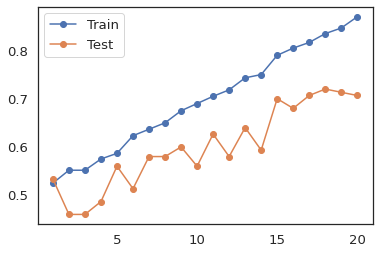

In [46]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

X_t, X_v, y_t, y_v = train_test_split(sub_1_dct, sub_1_markers, test_size=0.2)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model = DecisionTreeClassifier(max_depth=i)
 # fit model on the training dataset
 model.fit(X_t, y_t)
 # evaluate on the train dataset
 train_yhat = model.predict(X_t)
 train_acc = accuracy_score(y_t, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 validation_yhat = model.predict(X_v)
 validation_acc = accuracy_score(y_v, validation_yhat)
 test_scores.append(validation_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, validation_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

# SCP features extraction from scratch

In [ ]:
# Creating dict to store original data and modified data
ori_data = dict()
mod_data = dict()

In [ ]:
# Create function to print keys() within dictionary
def showKeys(dict_name):
    print('Keys in this dict are: ')
    for i in dict_name.keys():
        print(i)

In [ ]:
# number of subject to be processed (n+1 for iteration purpose)
ns = 2

In [ ]:
# function to count subject
def subjectCounter(i):
    return 'subject0{}'.format(i)

In [ ]:
# Initialize 'subject0x' dict inside mod_data
for i in range(1, ns+1):
    subj = subjectCounter(i)
    mod_data[subj] = {}
    
mod_data

{'subject01': {}, 'subject02': {}}

In [ ]:
ori_data['subject01'] = sub_1_data.reshape(750*250, 8).T
ori_data['subject02'] = sub_2_data.reshape(750*250, 8).T

In [ ]:
# Peek into different shape of recorded data/'s' between subjects
print('Electrodes\tSample')
for i in range(1, ns+1):
    subj_temp = subjectCounter(i)
    print(ori_data[subj_temp].shape)

Electrodes	Sample
(8, 187500)
(8, 187500)


In [ ]:
# First extract the sample data from ori_data into mod_data
for i in range(1, ns+1):
    subj = subjectCounter(i)
    mod_data[subj]['raw_EEG'] = ori_data[subj].T

# Bandpass filtering 8-30 Hz

Using FIR [8 30] Hz band-pass filter to remove muscle artifacts, powerline noise, and DC drift
The command fir1 in used in MATLAB which is equivalent to scipy.signal.firwin in python
Next EEG signals between [0.5, 3.5] seconds after cue onset are extracted

In [ ]:
from scipy.signal import firwin, freqz, lfilter

In [ ]:
# From document freqeuncy sampling at 250 Hz
fs = 250

In [ ]:
def fir_bandpass(numtaps, low, high, fs):
    fnyq = fs/2
    b = firwin(numtaps, np.array([low, high])/(fnyq), pass_zero = 'bandpass')
    
    return b 

In [ ]:
# This function will apply bandpass filter to raw EEG data
def apply_bandpass(raw_EEG, b):
    '''
    INPUT:
    raw_EEG : EEG data in the shape of S x N
    b : coefficient of band-pass filter
    
    OUTPUT:
    EEG_filtered : filtered EEG data shape S x N
    
    N : number of channel
    S : number of sample
    '''
    raw_EEG = lfilter(b, 1, raw_EEG, axis=0)
    
    return raw_EEG

In [ ]:
# Creating band-pass filter
b = fir_bandpass(51, low=8, high=30, fs=fs)

In [ ]:
# Applying bandpass

# Key to access data
raw_EEG = 'raw_EEG'

# Key to store result
EEG_filtered = 'EEG_filtered'

for i in range(1, ns+1):
    subj = subjectCounter(i)
    
    temp_raw_EEG = mod_data[subj][raw_EEG]
    
    mod_data[subj][EEG_filtered] = apply_bandpass(temp_raw_EEG, b)

In [ ]:
sub_1_markers

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [ ]:
modified_markers_sub_1 = []
for i,marker in enumerate(sub_1_markers):
        modified_markers_sub_1+= [sub_1_markers[i]]*250
        
modified_markers_sub_2 = []
for i,marker in enumerate(sub_2_markers):
        modified_markers_sub_2+= [sub_2_markers[i]]*250        

In [ ]:
 mod_data['subject02']

{'raw_EEG': array([[ 781049,  677342,  154446, ...,  865126,  154553,  203799],
        [ 250647,  601034,  693294, ...,  166239,  741398,  160273],
        [ 843148,  745245,  722414, ...,  252355,  800764,  601045],
        ...,
        [-101642, -109149,  -93108, ..., -124670, -264922, -178185],
        [-101635, -109141,  -93049, ..., -124174, -263962, -177694],
        [-101597, -109114,  -93146, ..., -124576, -264259, -177975]]),
 'EEG_filtered': array([[  754.44097316,   654.26696358,   149.18448207, ...,
           835.65371871,   149.2878369 ,   196.85617149],
        [  509.07310796,   812.07609424,   722.46563583, ...,
           456.27841134,   768.9674479 ,   224.47208767],
        [  898.16913609,   923.62063043,   934.39238891, ...,
           298.44433783,  1026.51506498,   634.84810565],
        ...,
        [ -740.77992576,  -795.99176589,  -676.60491166, ...,
          -914.49933748, -1950.48136672, -1298.53812121],
        [ -741.51495833,  -796.42398814,  -682.8050

# Taking EEG data corresponds to left and right class

Current method of CSP calculation requires EEG red and EEG white data,
thus the goal here is to make EEG red and EEG white class each has dimension T x C x N, where
T = trial, C = channel, N = sample

In [ ]:
# First take the position of red and white class
red_pos = 'red_pos'
white_pos = 'white_pos'

mod_data['subject01'][red_pos] = []
mod_data['subject01'][white_pos] = []

for j,_ in enumerate(sub_1_markers):
    if sub_1_markers[j] == 0:
        mod_data['subject01'][red_pos]+= [j]
    else:
        mod_data['subject01'][white_pos]+= [j]
        

        
        
        
mod_data['subject02'][red_pos] = []
mod_data['subject02'][white_pos] = []

for j,_ in enumerate(sub_2_markers):
    if sub_2_markers[j] == 0:
        mod_data['subject02'][red_pos]+= [j]
    else:
        mod_data['subject02'][white_pos]+= [j]        

In [ ]:
 np.array(mod_data['subject02'][red_pos]).shape

(375,)

In [ ]:
print(len(mod_data[subj][EEG_filtered]),len(mod_data[subj][EEG_filtered][0]))

187500 8


In [ ]:
# Now take EEG data within [0.5 3.5] seconds after cue onset position of each class
start = 0.0
end = 1.0

# Key to access data
EEG_filtered = 'EEG_filtered'

# Key to store result
EEG_red = 'EEG_red'
EEG_white = 'EEG_white'

for i in range(1, ns+1):
    subj = subjectCounter(i)
        
    # Temporary variable of left and right pos    
    temp_pos_red = mod_data[subj][red_pos]
    temp_pos_white = mod_data[subj][white_pos]

    temp_EEG_red = []
    temp_EEG_white = []
    
    # LEFT
    for j in range(len(temp_pos_red)):
        if (temp_pos_red[j] + int(end*fs)) <= len(mod_data[subj][EEG_filtered]):
            temp_EEG_red.append(mod_data[subj][EEG_filtered]\
                             [temp_pos_red[j] + int(start*fs) : temp_pos_red[j] + int(end*fs)].T)
        else:
            temp_EEG_red.append(mod_data[subj][EEG_filtered]\
                             [temp_pos_red[j] + int(start*fs) :].T)
            
    mod_data[subj][EEG_red] = temp_EEG_red
    
    # RIGHT
    for j in range(len(temp_pos_white)):
        if (temp_pos_red[j] + int(end*fs)) <= len(mod_data[subj][EEG_filtered]):
                temp_EEG_white.append(mod_data[subj][EEG_filtered]\
                              [temp_pos_white[j] + int(start*fs) : temp_pos_white[j] + int(end*fs)].T)
        else:
             temp_EEG_white.append(mod_data[subj][EEG_filtered]\
                              [temp_pos_white[j] + int(start*fs) :].T)
                
    mod_data[subj][EEG_white] = temp_EEG_white


In [ ]:
print(mod_data['subject01'][EEG_red])

[array([[ -158.50187142,  -214.63730967,  -214.43689972, ...,
        -1188.6194829 , -1183.66192143, -1179.161695  ],
       [ -159.43979232,  -215.91484878,  -215.71477734, ...,
        -1199.40225046, -1201.83156628, -1202.78025821],
       [ -132.0884346 ,  -178.90238346,  -177.94666491, ...,
         -977.09709961,  -988.41511121, -1000.4866232 ],
       ...,
       [ -117.61006545,  -159.26402335,  -158.75055007, ...,
         -880.43557637,  -882.27377986,  -885.32554484],
       [ -129.73059224,  -175.62616375,  -175.18572201, ...,
         -968.58607567,  -968.10597336,  -968.87469128],
       [ -244.00915491,  -330.50827478,  -329.61605731, ...,
        -1777.45502511, -1779.83786164, -1784.59520196]]), array([[ -214.63730967,  -214.43689972,  -264.60408303, ...,
        -1183.66192143, -1179.161695  , -1177.63607752],
       [ -215.91484878,  -215.71477734,  -266.17288216, ...,
        -1201.83156628, -1202.78025821, -1202.98244555],
       [ -178.90238346,  -177.94666491,  

In [ ]:
# Checking if raw EEG contains NaN
isnan = []
for i in range(1, ns+1):
    subj = subjectCounter(i)
    temp = np.isnan(mod_data[subj]['raw_EEG'])
    isnan.append(np.sum(temp))
    
isnan

[0, 0]

In [ ]:
# Checking current size of EEG red and white data
print('\t\tred \t\t white')

for i in range(1, ns+1):
    
    subj = subjectCounter(i)
    temp = mod_data[subj]
    
    print('subject{:02d}:\t{}\t{}'.format(i, (len(temp['EEG_red']),len(temp['EEG_red'][1]),len(temp['EEG_red'][1][1])), (len(temp['EEG_white']),len(temp['EEG_white'][1]),len(temp['EEG_white'][1][1]))))

		red 		 white
subject01:	(375, 8, 250)	(375, 8, 250)
subject02:	(375, 8, 250)	(375, 8, 250)


# Split into test and train data

In [ ]:
def split_EEG_one_class(EEG_one_class, EEG_one_class_pos, percent_train=0.8):
    '''
    split_EEG_one_class will receive EEG data of one class, with size of T x N x M, where
    T = number of trial
    N = number of electrodes
    M = sample number
    
    INPUT:
    EEG_data_one_class: the data of one class of EEG data
    
    percent_train: allocation percentage of training data, default is 0.8
    
    OUTPUT:
    EEG_train: EEG data for training
    
    EEG_test: EEG data for test
    
    Both have type of np.arrray dimension of T x M x N
    '''

    # Number of all trials
    n = len(EEG_one_class)
    
    n_tr = round(n*percent_train)
    n_te = n - n_tr
    
    EEG_train = EEG_one_class[:n_tr]
    EEG_test = EEG_one_class[n_tr:n_tr+n_te]
    
    EEG_train_pos = EEG_one_class_pos[:n_tr]
    EEG_test_pos = EEG_one_class_pos[n_tr:n_tr+n_te]
    
    return EEG_train, EEG_test, EEG_train_pos, EEG_test_pos

In [ ]:
# Keys to access data
EEG_red = 'EEG_red'
EEG_white = 'EEG_white'

# Keys to store result
EEG_red_train = 'EEG_red_train'
EEG_white_train = 'EEG_white_train'

EEG_red_test = 'EEG_red_test'
EEG_white_test = 'EEG_white_test'

EEG_red_pos_train = 'EEG_red_pos_train'
EEG_white_pos_train = 'EEG_white_pos_train'

EEG_red_pos_test = 'EEG_red_pos_test'
EEG_white_pos_test = 'EEG_white_pos_test'

for i in range(1, ns+1):
    
    subj = subjectCounter(i)
    
    mod_data[subj][EEG_red_train], mod_data[subj][EEG_red_test], mod_data[subj][EEG_red_pos_train], mod_data[subj][EEG_red_pos_test] = split_EEG_one_class(mod_data[subj][EEG_red],mod_data[subj][red_pos], 0.8)
    mod_data[subj][EEG_white_train], mod_data[subj][EEG_white_test], mod_data[subj][EEG_white_pos_train], mod_data[subj][EEG_white_pos_test] = split_EEG_one_class(mod_data[subj][EEG_white],mod_data[subj][white_pos], 0.8)   

In [ ]:
mod_data['subject01']['EEG_white_pos_train'][1]

11

In [ ]:
# Checking size of EEG red_pos and white_pos data training and test data
print('\t\tred \t\t white')
print('TRAINING')
for i in range(1, ns+1):
    
    subj = subjectCounter(i)
    temp = mod_data[subj]
    
    print('subject{:02d}:\t{}\t\t{}'.format(i, (len(temp['EEG_red_pos_train'])), (len(temp['EEG_white_pos_train']))))

print('TEST')
for i in range(1, ns+1):
    
    subj = subjectCounter(i)
    temp = mod_data[subj]
    
    print('subject{:02d}:\t{}\t\t{}'.format(i, (len(temp['EEG_red_pos_test'])), (len(temp['EEG_white_pos_test']))))

		red 		 white
TRAINING
subject01:	300		300
subject02:	300		300
TEST
subject01:	75		75
subject02:	75		75


In [ ]:
# Checking size of EEG red and white data training and test data
print('\t\tred \t\t white')
print('TRAINING')
for i in range(1, ns+1):
    
    subj = subjectCounter(i)
    temp = mod_data[subj]
    
    print('subject{:02d}:\t{}\t{}'.format(i, (len(temp['EEG_red_train']),len(temp['EEG_red_train'][1]),len(temp['EEG_red_train'][1][1])), (len(temp['EEG_white_train']),len(temp['EEG_white_train'][1]),len(temp['EEG_white_train'][1][1]))))

print('TEST')
for i in range(1, ns+1):
    
    subj = subjectCounter(i)
    temp = mod_data[subj]
    
    print('subject{:02d}:\t{}\t{}'.format(i, (len(temp['EEG_red_test']),len(temp['EEG_red_test'][1]),len(temp['EEG_red_test'][1][1])), (len(temp['EEG_white_test']),len(temp['EEG_white_test'][1]),len(temp['EEG_white_test'][1][1]))))

		red 		 white
TRAINING
subject01:	(300, 8, 250)	(300, 8, 250)
subject02:	(300, 8, 250)	(300, 8, 250)
TEST
subject01:	(75, 8, 250)	(75, 8, 250)
subject02:	(75, 8, 250)	(75, 8, 250)


# CSP

In [ ]:
# For all subject create new keys to store all result in CSP step
for i in range(1, ns+1):
    subj = subjectCounter(i)
    
    mod_data[subj]['CSP'] = {}

# Covariance and Composite Covariance


In [ ]:
def compute_cov(EEG_data):
    '''
    INPUT:
    EEG_data : EEG_data in shape T x N x S
    
    OUTPUT:
    avg_cov : covariance matrix of averaged over all trials
    '''
    cov = []
    for i in range(len(EEG_data)):
        cov.append(EEG_data[i]@EEG_data[i].T/np.trace(EEG_data[i]@EEG_data[i].T))
        
    cov = np.mean(np.array(cov), 0)
    
    return cov

In [ ]:
# Key to access data
EEG_red_train = 'EEG_red_train'
EEG_white_train = 'EEG_white_train'

# Key to store data
CSP = 'CSP'
cov_red = 'cov_red'
cov_white = 'cov_white'
cov_comp = 'cov_comp'

for i in range(1, ns+1):
    subj = subjectCounter(i)
    
    # New key to store result
    temp_CSP = mod_data[subj][CSP]
    
    # LEFT
    temp_CSP[cov_red] = compute_cov(mod_data[subj][EEG_red_train])

    # RIGHT
    temp_CSP[cov_white] = compute_cov(mod_data[subj][EEG_white_train])
    
    # Add covariance of left and right class as composite covariance
    temp_CSP[cov_comp] = temp_CSP[cov_red] + temp_CSP[cov_white]

In [ ]:
print(len(temp_CSP[cov_comp]),len(temp_CSP[cov_comp][0]))

8 8


In [ ]:
print(len(temp_CSP[cov_white]),len(temp_CSP[cov_white][0]))

8 8


In [ ]:
print(len(temp_CSP[cov_red]),len(temp_CSP[cov_red][0]))

8 8


# White Matrix (P)

In [ ]:
# Create new keys for result in whitening step
for i in range(1, ns+1):
    subj = subjectCounter(i)
    
    mod_data[subj]['CSP']['whitening'] = {}

In [ ]:
from scipy.linalg import sqrtm
from scipy.linalg import inv

In [ ]:
def decompose_cov(avg_cov):
    '''
    This function will decompose average covariance matrix of one class of each subject into 
    eigenvalues denoted by lambda and eigenvector denoted by V
    Both will be in descending order
    
    Parameter:
    avgCov = the averaged covariance of one class
    
    Return:
    λ_dsc and V_dsc, i.e. eigenvalues and eigenvector in descending order
    
    '''
    λ, V = np.linalg.eig(avg_cov)
    λ_dsc = np.sort(λ)[::-1] # Sort eigenvalue descending order, default is ascending order sort
    idx_dsc = np.argsort(λ)[::-1] # Find index in descending order
    V_dsc = V[:, idx_dsc] # Sort eigenvectors descending order
    λ_dsc = np.diag(λ_dsc) # Diagonalize λ_dsc
    
    return λ_dsc, V_dsc

In [ ]:
def white_matrix(λ_dsc, V_dsc):
    '''
    '''
    λ_dsc_sqr = sqrtm(inv(λ_dsc))
    P = (λ_dsc_sqr)@(V_dsc.T)
    
    return P

In [ ]:
# Keys to access data
whitening = 'whitening'
cov_comp = 'cov_comp'

# Keys to store result
eigval = 'eigval'
eigvec = 'eigvec'
P = 'P'

for i in range(1, ns+1):
    subj = subjectCounter(i)
    
    temp_whitening = mod_data[subj][CSP][whitening]
    
    temp_cov = mod_data[subj][CSP][cov_comp]
    
    # Decomposing composite covariance into eigenvector and eigenvalue
    temp_whitening[eigval], temp_whitening[eigvec] = decompose_cov(temp_cov)
    
    # White matrix
    temp_whitening[P] = white_matrix(temp_whitening[eigval], temp_whitening[eigvec])

In [ ]:
print(len(temp_whitening[P]),len(temp_whitening[P][0]))

8 8


# Common Eigenvec from Sl and Sr

In [ ]:
# Create new keys for result in decomposing Sl and Sr
for i in range(1, ns+1):
    subj = subjectCounter(i)
    
    mod_data[subj]['CSP']['S_red'] = {}
    mod_data[subj]['CSP']['S_white'] = {}      

In [ ]:
def compute_S(avg_Cov, white):
    '''
    This function will compute S matrix, S = P * C * P.T

    INPUT:
    avg_Cov: averaged covariance of one class, dimension N x N, where N is number of electrodes
    white: the whitening transformation matrix
    
    OUTPUT:
    S
    '''
    S = white@avg_Cov@white.T
    
    return S

In [ ]:
def decompose_S(S_one_class, order='descending'):
    '''
    This function will decompose the S matrix of one class to get the eigen vector
    Both eigenvector will be the same but in opposite order
    
    i.e the highest eigenvector in S left will be equal to lowest eigenvector in S right matrix 
    '''
    # Decompose S
    λ, B = np.linalg.eig(S_one_class)
    
    # Sort eigenvalues either descending or ascending
    if order == 'ascending':
        idx = λ.argsort() # Use this index to sort eigenvector smallest -> largest
    elif order == 'descending':
        idx = λ.argsort()[::-1] # Use this index to sort eigenvector largest -> smallest
    else:
        print('Wrong order input')
    
    λ = λ[idx]
    B = B[:, idx]
    
    return B, λ 

In [ ]:
# Keys to access data
P = 'P'
cov_red = 'cov_red'
cov_white = 'cov_white'
CSP = 'CSP'

# Keys to store data
S_red = 'S_red'
S_white = 'S_white'
eigvec = 'eigvec'
eigval = 'eigval'

for i in range(1, ns+1):
    subj = subjectCounter(i)
    
    # Where to access data
    temp_P = mod_data[subj][CSP][whitening][P]
    Cl = mod_data[subj][CSP][cov_red]
    Cr = mod_data[subj][CSP][cov_white]
    
    # Where to store result
    temp_Sl = mod_data[subj][CSP][S_red]
    temp_Sr = mod_data[subj][CSP][S_white]

    # LEFT
    Sl = compute_S(Cl, temp_P)
    temp_Sl[eigvec], temp_Sl[eigval] = decompose_S(Sl, 'descending')
    
    # RIGHT
    Sr = compute_S(Cr, temp_P)
    temp_Sr[eigvec], temp_Sr[eigval] = decompose_S(Sr, 'ascending')   

In [ ]:
temp_ = temp_Sl[eigval] + temp_Sr[eigval]

In [ ]:
temp_

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
print(len(temp_Sl[eigval]))

8


# Spatial Filter (W)

In [ ]:
def spatial_filter(B, P):
    '''
    Will compute projection matrix using the following equation:
    W = B' @ P
    
    INPUT:
    B: the eigenvector either left or right class, choose one, size N x N, N is number of electrodes
    P: white matrix in size of N x N 
    
    OUTPUT:
    W spatial filter to filter EEG
    '''
    
    return (B.T@P)

In [ ]:
# Key to access data
CSP = 'CSP'
eigvec = 'eigvec'
S_left = 'S_white'
P = 'P'

# Key to store variable
W = 'W'

for i in range(1, ns+1):
    subj = subjectCounter(i)
    
    temp_eigvec = mod_data[subj][CSP][S_red][eigvec]
    temp_P = mod_data[subj][CSP][whitening][P]
    
    mod_data[subj][CSP][W] = spatial_filter(temp_eigvec, temp_P)

In [ ]:
mod_data[subj][CSP][W]

array([[ 1.13797218,  1.07480129,  0.44354138,  0.38254993, -0.00568403,
         0.62309371,  0.6101643 , -0.33456745],
       [ 0.31215623,  0.77979674, -1.34520747, -1.0412402 ,  0.83525699,
        -0.05618534,  0.17685889,  0.06037404],
       [-0.96427523, -0.16327743, -0.46824439, -0.00329889, -0.23781461,
         1.38905376,  0.72495836, -0.47340033],
       [ 0.06686204,  0.36808215, -0.23009668, -0.16460768, -1.09801052,
         0.40112921, -0.06291747,  1.74651116],
       [-0.7720801 ,  0.45359273, -0.77900774,  1.39106285,  0.7163427 ,
        -0.0781765 , -0.38872363,  0.43150322],
       [-0.42985027,  1.36750908,  0.5052439 , -0.3233479 , -0.82296389,
        -0.22624906, -0.73527597, -0.65478043],
       [ 0.52868125, -0.28533757, -1.2141305 ,  0.33148345, -1.05847731,
        -0.30356679,  0.20140776, -0.69436128],
       [-0.59146385,  0.32568013,  0.06560075,  0.10934311,  0.06297937,
        -1.3035928 ,  1.66707568,  0.49939135]])

# Feature Vector Train

In [ ]:
# Create new keys for trainning and test feature vector
for i in range(1, ns+1):
    subj = subjectCounter(i)
    
    mod_data[subj]['train']= {}
    mod_data[subj]['test']= {}     

In [ ]:
# Select number of filter
m = 2

In [ ]:
def compute_Z(W, E, m):
    '''
    Will compute the Z
    Z = W @ E, 
    
    E is in the shape of N x M, N is number of electrodes, M is sample
    In application, E has nth trial, so there will be n numbers of Z
    
    Z, in each trial will have dimension of m x M, 
    where m is the first and last m rows of W, corresponds to smallest and largest eigenvalues
    '''
    Z = []
    
    W = np.delete(W, np.s_[m:-m:], 0)
    
    for i in range(len(E)):
        Z.append(W @ E[i])
    
    return Z

In [ ]:
def feat_vector(Z):
    '''
    Will compute the feature vector of Z matrix
    
    INPUT:
    Z : projected EEG shape of T x N x S
    
    OUTPUT:
    feat : feature vector shape of T x m
    
    T = trial
    N = channel
    S = sample
    m = number of filter
    '''
    
    feat = []
    
    for i in range(len(Z)):
        var = np.var(np.array(Z[i]), ddof=1, axis=1)
        varsum = np.sum(var)
        
        feat.append(np.log10(var/varsum))
        
    return feat

In [ ]:
print()

In [ ]:
# Where to access data
EEG_red_train = 'EEG_red_train'
EEG_white_train = 'EEG_white_train'
W = 'W'

# Where to store data
train = 'train'
Z_red = 'Z_red'
Z_white = 'Z_white'
feat_red = 'feat_red'
feat_white = 'feat_white'

for i in range(1, ns+1):
    subj = subjectCounter(i)
    
    temp_W = mod_data[subj][CSP][W]
    temp_EEG_red = mod_data[subj][EEG_red_train]
    temp_EEG_white = mod_data[subj][EEG_white_train]
    
    # RED
    mod_data[subj][train][Z_red] = compute_Z(temp_W, temp_EEG_red, m)
    mod_data[subj][train][feat_red] = feat_vector(mod_data[subj][train][Z_red])

    
    # WHITE
    mod_data[subj][train][Z_white] = compute_Z(temp_W, temp_EEG_white, m)
    mod_data[subj][train][feat_white] = feat_vector(mod_data[subj][train][Z_white])

In [ ]:
mod_data['subject01']['train']['feat_red']

[array([-0.14960844, -0.76020848, -0.93972702, -2.54799786]),
 array([-0.14962593, -0.76020478, -0.93962546, -2.5479673 ]),
 array([-0.14964398, -0.76019935, -0.93952378, -2.54791119]),
 array([-0.14966412, -0.76019249, -0.93941337, -2.54777538]),
 array([-0.14968783, -0.76018094, -0.93929127, -2.54751135]),
 array([-0.14971585, -0.76015657, -0.93916476, -2.54713463]),
 array([-0.14974779, -0.76011313, -0.93904423, -2.54670822]),
 array([-0.1497807 , -0.76005783, -0.93893603, -2.54626817]),
 array([-0.14980854, -0.76001311, -0.9388438 , -2.54580063]),
 array([-0.14982616, -0.75999614, -0.93877231, -2.54534317]),
 array([-0.14996572, -0.75974917, -0.93831124, -2.54436894]),
 array([-0.14999848, -0.75969699, -0.93820007, -2.54391273]),
 array([-0.15003136, -0.75972868, -0.93799026, -2.54230826]),
 array([-0.1501126 , -0.75988433, -0.93736682, -2.53793927]),
 array([-0.15039418, -0.76004375, -0.93568624, -2.52688924]),
 array([-0.21883068, -0.64864818, -0.85849038, -1.48509732]),
 array([

In [ ]:
mod_data['subject01']['train']['Z_red']

[array([[ 3.74805786e+02,  5.09572536e+02,  4.92205120e+02,
          5.88030699e+02,  1.20174736e+03,  2.62805152e+03,
          4.74770616e+03,  6.85770649e+03,  7.82386623e+03,
          6.63999913e+03,  3.13073059e+03, -1.61897226e+03,
         -5.60063241e+03, -7.10128277e+03, -6.24791366e+03,
         -5.91850162e+03, -1.10556700e+04, -2.62903471e+04,
         -5.28502227e+04, -8.63524574e+04, -1.17010799e+05,
         -1.32622160e+05, -1.23384775e+05, -8.65008382e+04,
         -2.82932030e+04,  3.73576628e+04,  9.38700134e+04,
          1.28016024e+05,  1.34476731e+05,  1.16991258e+05,
          8.58160763e+04,  5.29904418e+04,  2.76845663e+04,
          1.35670695e+04,  8.97523184e+03,  9.22541970e+03,
          9.62548757e+03,  7.64486258e+03,  3.39187245e+03,
         -1.35583613e+03, -4.70323386e+03, -5.74283147e+03,
         -4.76537425e+03, -2.77046722e+03, -7.65634615e+02,
          6.67294990e+02,  1.45322966e+03,  1.84410883e+03,
          2.15700284e+03,  2.61359221e+0

In [ ]:
print(len(mod_data['subject01']['train']['Z_red']),len(mod_data['subject01']['train']['Z_red'][0]),len(mod_data['subject01']['train']['Z_red'][0][0]))

300 4 250


# True label for each class

In [ ]:
# Key to access data
train = 'train'
feat_red = 'feat_red'
feat_white = 'feat_white'

# Key to store data
feat_train = 'feat_train'

for i in range(1, ns+1):
    subj = subjectCounter(i)
    
    temp_feat_red = mod_data[subj][train][feat_red]
    temp_feat_white = mod_data[subj][train][feat_white]
    
    red_label = np.ones([len(temp_feat_red), 1])*-1
    white_label = np.ones([len(temp_feat_white), 1])    
    
    red  = np.concatenate([temp_feat_red, red_label], axis=1)
    white  = np.concatenate([temp_feat_white, white_label], axis=1)  
    
    mod_data[subj][train][feat_train] = np.vstack([red, white])
    
    np.random.shuffle(mod_data[subj][train][feat_train])

In [ ]:
 len(mod_data['subject01'][EEG_red_test])

75

# Feature Vector Test

In [ ]:
# Where to access data
EEG_red_test = 'EEG_red_test'
EEG_white_test = 'EEG_white_test'
W = 'W'

# Where to store data
test = 'test'
feat_test = 'feat_test'
Z_red = 'Z_red'
Z_white = 'Z_white'
feat_red = 'feat_red'
feat_white = 'feat_white'

for i in range(1, ns+1):
    subj = subjectCounter(i)
    
    temp_W = mod_data[subj][CSP][W]
    temp_EEG_red = mod_data[subj][EEG_red_test]
    temp_EEG_white = mod_data[subj][EEG_white_test]
    
    # RED
    mod_data[subj][test][Z_red] = compute_Z(temp_W, temp_EEG_red, m)
    mod_data[subj][test][feat_red] = feat_vector(mod_data[subj][test][Z_red])
    
    # WHITE
    mod_data[subj][test][Z_white] = compute_Z(temp_W, temp_EEG_white, m)
    mod_data[subj][test][feat_white] = feat_vector(mod_data[subj][test][Z_white])
    
    # Key to access data
    test = 'test'
    # Key to store data
    feat_test = 'feat_test'

    for i in range(1, ns+1):
        subj = subjectCounter(i)
        temp_feat_red = mod_data[subj][test][feat_red]
        temp_feat_white = mod_data[subj][test][feat_white]
    
        red_label = np.ones([len(temp_feat_red), 1])*-1
        white_label = np.ones([len(temp_feat_white), 1])    
    
        red  = np.concatenate([temp_feat_red, red_label], axis=1)
        white  = np.concatenate([temp_feat_white, white_label], axis=1)   
    
        mod_data[subj][test][feat_test] = np.vstack([red, white])
    
        np.random.shuffle(mod_data[subj][test][feat_test])
    

In [ ]:
dframe = pd.DataFrame

In [ ]:
dframe(mod_data[subj][test][feat_test]).head()

0         1         2         3    4
0 -0.864590 -0.610694 -0.593694 -0.439530 -1.0
1 -0.697716 -0.588952 -0.653462 -0.495303  1.0
2 -0.848798 -0.638266 -0.601039 -0.422780 -1.0
3 -0.746535 -0.607537 -0.639438 -0.462814 -1.0
4 -0.853732 -0.629044 -0.599178 -0.427883  1.0

In [ ]:
len(mod_data[subj][test][feat_test])

150

In [ ]:
print(len(mod_data['subject01'][test][Z_white]),len(mod_data['subject01'][test][Z_white][0]))

75 4


In [ ]:
mod_data['subject01']['test']['feat_test'].shape

(150, 5)

In [ ]:
scratch_CSP_test = np.vstack([mod_data['subject01']['test']['feat_test'],mod_data['subject02']['test']['feat_test']])

In [ ]:
scratch_CSP_train = np.vstack([mod_data['subject01']['train']['feat_train'],mod_data['subject02']['train']['feat_train']])

In [ ]:
scratch_CSP = np.vstack([scratch_CSP_features_test, scratch_CSP_features_train])

In [ ]:
scratch_CSP_features = scratch_CSP[:,:-1]
scratch_CSP_labels = scratch_CSP[:,-1]

In [ ]:
scratch_CSP_features.shape

(1500, 4)

In [ ]:
scratch_CSP_labels.shape

(1500,)

In [ ]:
train_test(scratch_CSP_features, scratch_CSP_labels)

[[127  94]
 [147  82]]
Linear SVM Accuracy: 46.44444444444444%
10 fold cross validation scores=  [0.47333333 0.48       0.46       0.50666667 0.44666667 0.44
 0.41333333 0.5        0.38       0.46666667]
average_10_fold=  0.4566666666666667
max_10_fold=  0.5066666666666667

Classification Report : 
              precision    recall  f1-score   support

        -1.0       0.46      0.57      0.51       221
         1.0       0.47      0.36      0.40       229

    accuracy                           0.46       450
   macro avg       0.46      0.47      0.46       450
weighted avg       0.46      0.46      0.46       450

[[122  99]
 [139  90]]
RBF SVM Accuracy: 47.11111111111111%
10 fold cross validation scores=  [0.46       0.51333333 0.5        0.49333333 0.45333333 0.43333333
 0.39333333 0.54666667 0.45333333 0.47333333]
average_10_fold=  0.4720000000000001
max_10_fold=  0.5466666666666666

Classification Report : 
              precision    recall  f1-score   support

        -1.0   

C:\Users\Anushka\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[137  84]
 [125 104]]
AdaBoost Accuracy: 53.55555555555556%
10 fold cross validation scores=  [0.59333333 0.54       0.59333333 0.5        0.51333333 0.56666667
 0.48666667 0.64       0.54666667 0.56666667]
average_10_fold=  0.5546666666666666
max_10_fold=  0.64

Classification Report : 
              precision    recall  f1-score   support

        -1.0       0.52      0.62      0.57       221
         1.0       0.55      0.45      0.50       229

    accuracy                           0.54       450
   macro avg       0.54      0.54      0.53       450
weighted avg       0.54      0.54      0.53       450



In [ ]:
# SCP_features_sub_1 = np.zeros((187500,4))
# SCP_features_sub_2 = np.zeros((187500,4))


# for j,_ in enumerate(mod_data['subject01'][EEG_red_pos_train]):
#     SCP_features_sub_1[mod_data['subject01'][EEG_red_pos_train][j]] = mod_data[subj][train][feat_red][j]
        
# for j,_ in enumerate(mod_data[subj][EEG_white_pos_train]):
#     SCP_features_sub_1[mod_data['subject01'][EEG_red_pos_train][j]] = mod_data[subj][train][feat_white][j]    
        
# for j,_ in enumerate(mod_data[subj][EEG_red_pos_test]):
#     SCP_features_sub_1[mod_data['subject01'][EEG_red_pos_test][j]] = mod_data[subj][test][feat_red][j]
        
# for j,_ in enumerate(mod_data[subj][EEG_white_pos_test]):
#     SCP_features_sub_1[mod_data['subject01'][EEG_white_pos_test][j]] = mod_data[subj][test][feat_white][j]    
    
    
    
    
    
# for j,_ in enumerate(mod_data['subject02'][EEG_red_pos_train]):
#     SCP_features_sub_2[mod_data['subject02'][EEG_red_pos_train][j]] = mod_data[subj][train][feat_red][j]
        
# for j,_ in enumerate(mod_data[subj][EEG_white_pos_train]):
#     SCP_features_sub_2[mod_data['subject02'][EEG_red_pos_train][j]] = mod_data[subj][train][feat_white][j]    
        
# for j,_ in enumerate(mod_data[subj][EEG_red_pos_test]):
#     SCP_features_sub_2[mod_data['subject02'][EEG_red_pos_test][j]] = mod_data[subj][test][feat_red][j]
        
# for j,_ in enumerate(mod_data[subj][EEG_white_pos_test]):
#     SCP_features_sub_2[mod_data['subject02'][EEG_white_pos_test][j]] = mod_data[subj][test][feat_white][j]    

In [ ]:
# for i,_ in enumerate(SCP_features_sub_1):
#     for j,_ in enumerate(SCP_features_sub_1[i]):
#         if math.isnan(SCP_features_sub_1[i][j]):
#             SCP_features_sub_1[i][j] = 0.5
            
# for i,_ in enumerate(SCP_features_sub_2):
#     for j,_ in enumerate(SCP_features_sub_2[i]):
#         if math.isnan(SCP_features_sub_2[i][j]):
#             SCP_features_sub_2[i][j] = 0.5           

In [ ]:
# print('sub_1_SCP_features_shape=',SCP_features_sub_1.shape)
# print(SCP_features_sub_1)

sub_1_SCP_features_shape= (187500, 4)
[[-0.57840092 -0.58173522 -0.72937747 -0.54128791]
 [-0.57811256 -0.5824584  -0.72990428 -0.54055362]
 [-0.57967449 -0.58263833 -0.7299591  -0.53892791]
 ...
 [ 0.5         0.5         0.5         0.5       ]
 [ 0.5         0.5         0.5         0.5       ]
 [ 0.5         0.5         0.5         0.5       ]]


In [ ]:
# print('sub_2_SCP_features_shape=',SCP_features_sub_2.shape)
# print(SCP_features_sub_2)

sub_2_SCP_features_shape= (187500, 4)
[[-0.57840092 -0.58173522 -0.72937747 -0.54128791]
 [-0.57811256 -0.5824584  -0.72990428 -0.54055362]
 [-0.57967449 -0.58263833 -0.7299591  -0.53892791]
 ...
 [ 0.5         0.5         0.5         0.5       ]
 [ 0.5         0.5         0.5         0.5       ]
 [ 0.5         0.5         0.5         0.5       ]]


In [ ]:
# !pip uninstall gumpy

^C


In [ ]:
# !pip install git+https://github.com/gumpy-bci/gumpy

  Cloning https://github.com/gumpy-bci/gumpy to c:\users\anushka\appdata\local\temp\pip-req-build-snx9l7aj
  Resolved https://github.com/gumpy-bci/gumpy to commit abd8230dc50bd8b0a2348c6e08a1bba1c0ed3146
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/gumpy-bci/gumpy 'C:\Users\Anushka\AppData\Local\Temp\pip-req-build-snx9l7aj'


In [ ]:
# sub_1_data_s = np.swapaxes(sub_1_data,2,1)

NameError: name 'np' is not defined

In [ ]:
# epochs_train, epochs_test, y_train, y_test = gumpy.split.stratified_shuffle_Split(sub_1_data, labels, n_splits=10,test_size=0.2,random_state=0)

AttributeError: module 'gumpy' has no attribute 'split'

# 

# CSP from mne

In [ ]:
!pip install mne

from mne.decoding import CSP

In [ ]:
#sub_1_data --- (1500,250,8) ---> (samples, sample freq, channels)
sub_data = np.concatenate((sub_1_data, sub_2_data), axis=0)

In [ ]:
sub_markers = np.concatenate((sub_1_markers, sub_2_markers), axis=0)

In [ ]:
sub_data.shape

(1500, 250, 8)

In [ ]:
sub_markers.shape

(1500,)

In [ ]:
type(sub_data)

numpy.ndarray

In [ ]:
p = sub_data.astype(float)
#sub_1_markers.shape

#need to transpose p from ((750, 250, 8)) to this ((750, 8, 250))

In [ ]:
m=p.transpose((0,2,1))
m.shape

(1500, 8, 250)

In [ ]:
csp = CSP(n_components=8, reg=None, log=True, norm_trace=False)
sub_csp_features = csp.fit_transform(m, sub_markers)

Computing rank from data with rank=None
    Using tolerance 5.4e+05 (2.2e-16 eps * 8 dim * 3.1e+20  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 5.4e+05 (2.2e-16 eps * 8 dim * 3e+20  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.


In [ ]:
sub_csp_features.shape

(1500, 8)

# PCA(principle component analysis)

In [ ]:
sub_PCA_features = np.vstack([sub_1_features,sub_2_features])

In [ ]:
sub_PCA_features.shape

(1500, 96)

In [ ]:
sub_marker = np.vstack([sub_1_markers,sub_2_markers])

In [ ]:
sub_markers.shape

(1500,)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
  
sub_PCA_features = sc.fit_transform(sub_PCA_features)

In [ ]:
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 2)
  
sub_PCA_features = pca.fit_transform(sub_PCA_features)

explained_variance = pca.explained_variance_ratio_

# accuracy on PCA features, mne_CSP features, DCT features, scratch_CSP_features

In [ ]:
train_test(sub_PCA_features, sub_markers)

[[ 44 179]
 [ 38 189]]
Linear SVM Accuracy: 51.77777777777778%
10 fold cross validation scores=  [0.53333333 0.47333333 0.56       0.5        0.54666667 0.48666667
 0.58       0.49333333 0.48666667 0.57333333]
average_10_fold=  0.5233333333333332
max_10_fold=  0.58

Classification Report : 
              precision    recall  f1-score   support

           0       0.54      0.20      0.29       223
           1       0.51      0.83      0.64       227

    accuracy                           0.52       450
   macro avg       0.53      0.51      0.46       450
weighted avg       0.52      0.52      0.46       450

[[ 41 182]
 [ 30 197]]
RBF SVM Accuracy: 52.888888888888886%
10 fold cross validation scores=  [0.48666667 0.49333333 0.57333333 0.54       0.54666667 0.46
 0.52666667 0.51333333 0.51333333 0.56666667]
average_10_fold=  0.522
max_10_fold=  0.5733333333333334

Classification Report : 
              precision    recall  f1-score   support

           0       0.58      0.18      0.

C:\Users\Anushka\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[150  73]
 [142  85]]
AdaBoost Accuracy: 52.22222222222223%
10 fold cross validation scores=  [0.48666667 0.6        0.56666667 0.55333333 0.62       0.63333333
 0.61333333 0.52666667 0.6        0.54      ]
average_10_fold=  0.5740000000000001
max_10_fold=  0.6333333333333333

Classification Report : 
              precision    recall  f1-score   support

           0       0.51      0.67      0.58       223
           1       0.54      0.37      0.44       227

    accuracy                           0.52       450
   macro avg       0.53      0.52      0.51       450
weighted avg       0.53      0.52      0.51       450



In [ ]:
train_test(sub_csp_features, sub_markers)

[[ 87 136]
 [ 76 151]]
Linear SVM Accuracy: 52.888888888888886%
10 fold cross validation scores=  [0.50666667 0.5        0.49333333 0.49333333 0.48       0.44666667
 0.5        0.54       0.49333333 0.47333333]
average_10_fold=  0.49266666666666675
max_10_fold=  0.54

Classification Report : 
              precision    recall  f1-score   support

           0       0.53      0.39      0.45       223
           1       0.53      0.67      0.59       227

    accuracy                           0.53       450
   macro avg       0.53      0.53      0.52       450
weighted avg       0.53      0.53      0.52       450

[[ 92 131]
 [ 89 138]]
RBF SVM Accuracy: 51.11111111111111%
10 fold cross validation scores=  [0.5        0.48       0.49333333 0.44       0.48666667 0.45333333
 0.44       0.50666667 0.48666667 0.5       ]
average_10_fold=  0.47866666666666663
max_10_fold=  0.5066666666666667

Classification Report : 
              precision    recall  f1-score   support

           0       0

C:\Users\Anushka\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[102 121]
 [ 82 145]]
KNN Accuracy: 54.888888888888886%
10 fold cross validation scores=  [0.53333333 0.61333333 0.58666667 0.53333333 0.56666667 0.56666667
 0.59333333 0.52       0.64666667 0.56      ]
average_10_fold=  0.5720000000000001
max_10_fold=  0.6466666666666666

Classification Report : 
              precision    recall  f1-score   support

           0       0.55      0.46      0.50       223
           1       0.55      0.64      0.59       227

    accuracy                           0.55       450
   macro avg       0.55      0.55      0.54       450
weighted avg       0.55      0.55      0.55       450

[[ 89 134]
 [ 84 143]]
AdaBoost Accuracy: 51.55555555555556%
10 fold cross validation scores=  [0.47333333 0.48666667 0.48666667 0.52       0.53333333 0.51333333
 0.57333333 0.55333333 0.54666667 0.58      ]
average_10_fold=  0.5266666666666667
max_10_fold=  0.58

Classification Report : 
              precision    recall  f1-score   support

           0       0.51     

In [ ]:
train_test(scratch_CSP_features, scratch_CSP_labels)

[[127  94]
 [147  82]]
Linear SVM Accuracy: 46.44444444444444%
10 fold cross validation scores=  [0.47333333 0.48       0.46       0.50666667 0.44666667 0.44
 0.41333333 0.5        0.38       0.46666667]
average_10_fold=  0.4566666666666667
max_10_fold=  0.5066666666666667

Classification Report : 
              precision    recall  f1-score   support

        -1.0       0.46      0.57      0.51       221
         1.0       0.47      0.36      0.40       229

    accuracy                           0.46       450
   macro avg       0.46      0.47      0.46       450
weighted avg       0.46      0.46      0.46       450

[[122  99]
 [139  90]]
RBF SVM Accuracy: 47.11111111111111%
10 fold cross validation scores=  [0.46       0.51333333 0.5        0.49333333 0.45333333 0.43333333
 0.39333333 0.54666667 0.45333333 0.47333333]
average_10_fold=  0.4720000000000001
max_10_fold=  0.5466666666666666

Classification Report : 
              precision    recall  f1-score   support

        -1.0   

C:\Users\Anushka\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[137  84]
 [125 104]]
AdaBoost Accuracy: 53.55555555555556%
10 fold cross validation scores=  [0.59333333 0.54       0.6        0.5        0.51333333 0.56666667
 0.48666667 0.64       0.54666667 0.56666667]
average_10_fold=  0.5553333333333333
max_10_fold=  0.64

Classification Report : 
              precision    recall  f1-score   support

        -1.0       0.52      0.62      0.57       221
         1.0       0.55      0.45      0.50       229

    accuracy                           0.54       450
   macro avg       0.54      0.54      0.53       450
weighted avg       0.54      0.54      0.53       450



In [ ]:
train_test(sub_1_dct, sub_1_markers)

[[54 57]
 [55 59]]
Linear SVM Accuracy: 50.22222222222222%
10 fold cross validation scores=  [0.38666667 0.53333333 0.42666667 0.34666667 0.45333333 0.52
 0.34666667 0.44       0.45333333 0.38666667]
average_10_fold=  0.4293333333333333
max_10_fold=  0.5333333333333333

Classification Report : 
              precision    recall  f1-score   support

           0       0.50      0.49      0.49       111
           1       0.51      0.52      0.51       114

    accuracy                           0.50       225
   macro avg       0.50      0.50      0.50       225
weighted avg       0.50      0.50      0.50       225

[[42 69]
 [61 53]]
RBF SVM Accuracy: 42.22222222222222%
10 fold cross validation scores=  [0.34666667 0.48       0.44       0.37333333 0.45333333 0.48
 0.33333333 0.44       0.36       0.42666667]
average_10_fold=  0.4133333333333333
max_10_fold=  0.48

Classification Report : 
              precision    recall  f1-score   support

           0       0.41      0.38      0.39

C:\Users\Anushka\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[63 48]
 [52 62]]
AdaBoost Accuracy: 55.55555555555556%
10 fold cross validation scores=  [0.57333333 0.57333333 0.61333333 0.68       0.53333333 0.65333333
 0.6        0.58666667 0.6        0.69333333]
average_10_fold=  0.6106666666666667
max_10_fold=  0.6933333333333334

Classification Report : 
              precision    recall  f1-score   support

           0       0.55      0.57      0.56       111
           1       0.56      0.54      0.55       114

    accuracy                           0.56       225
   macro avg       0.56      0.56      0.56       225
weighted avg       0.56      0.56      0.56       225

